# Climate Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
num_samples = 1000
num_features = 12
data = np.random.rand(num_samples, num_features) * 100

In [3]:
columns = [
    'Industrial Emissions',
    'Vehicle Emissions',
    'Chemical Spills',
    'Agricultural Runoff',
    'Livestock Methane',
    'Urban Waste',
    'Construction Dust',
    'Energy Production Emissions',
    'Deforestation Impact',
    'Landfill Emissions',
    'Household Chemical Use',
    'Mining Waste'
]

In [4]:
df = pd.DataFrame(data, columns=columns)

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA()
pca.fit(scaled_data)

PCA()

In [6]:
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

In [7]:
transformed_data = pca.transform(scaled_data)

In [8]:
def visualize_pollution(data, pca_model, components=(0,1), title='Industrial Pollution Monitoring'):
    plt.figure(figsize=(10,6))
    plt.scatter(data[:, components[0]], data[:, components[1]], alpha=0.5, c='red')
    plt.title(title)
    plt.xlabel(f'Principal Component {components[0] + 1}')
    plt.ylabel(f'Principal Component {components[1] + 1}')
    plt.grid(True)
    plt.xticks()
    plt.yticks()
    plt.show()

In [12]:
def print_explained_variance(pca_model):
    explained_variance_df = pd.DataFrame({
        'Principal Component': range(1, num_features + 1),
        'Explained Variance Ratio': pca_model.explained_variance_ratio_
    })
    print(explained_variance_df)

In [13]:
def monitor_industrial_emissions(data, pca_model):
    visualize_pollution(data, pca_model, components=(0, 1), title='Industrial Emissions Monitoring')
    print_explained_variance(pca_model)

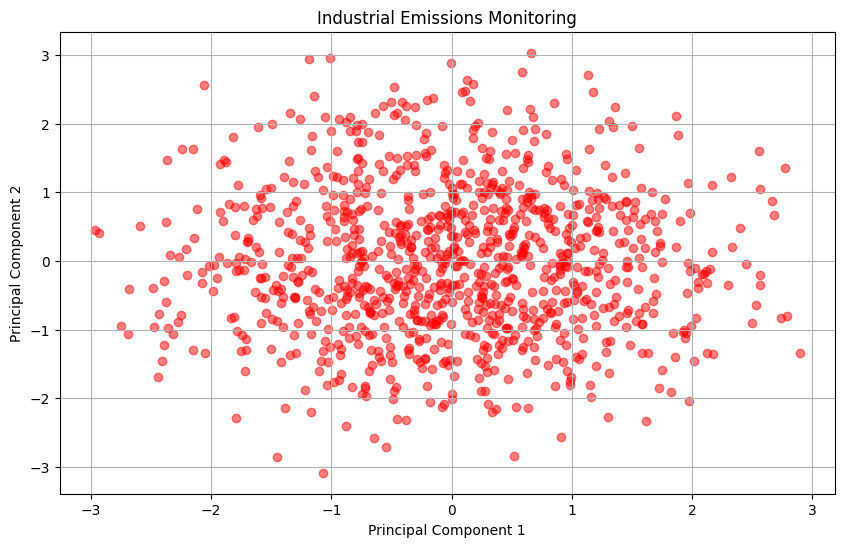

    Principal Component  Explained Variance Ratio
0                     1                  0.098269
1                     2                  0.096692
2                     3                  0.089756
3                     4                  0.087590
4                     5                  0.087356
5                     6                  0.085215
6                     7                  0.080508
7                     8                  0.079220
8                     9                  0.077885
9                    10                  0.074454
10                   11                  0.072592
11                   12                  0.070464


In [14]:
monitor_industrial_emissions(transformed_data, pca)

In [15]:
def simulate_continuous_monitoring(pca_model, scaler, interval=100):
    for i in range(0, num_samples, interval):
        new_data = np.random.rand(interval, num_features) * 100
        scaled_new_data = scaler.transform(new_data)
        transformed_new_data = pca_model.transform(scaled_new_data)
        visualize_pollution(transformed_new_data, pca_model, components=(0,1), title=f'Industrial Emissions Monitoring (Sample {i} to {i + 1})')

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


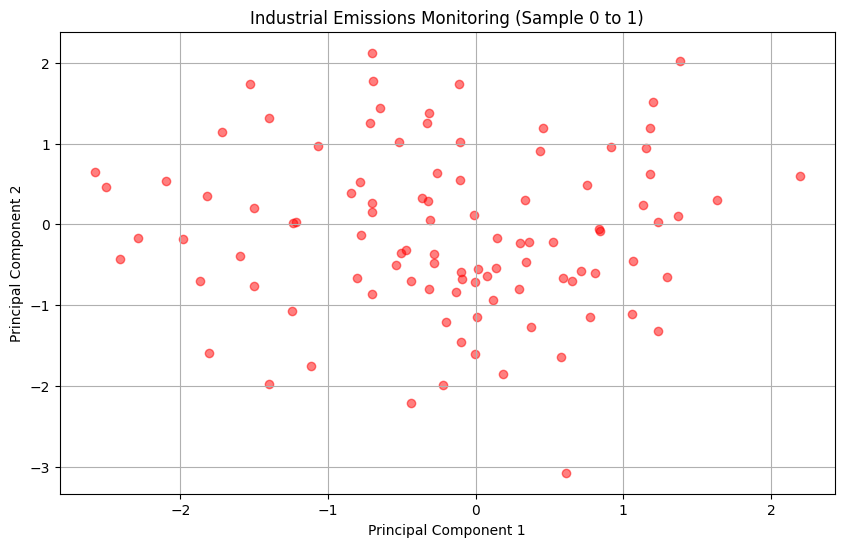

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


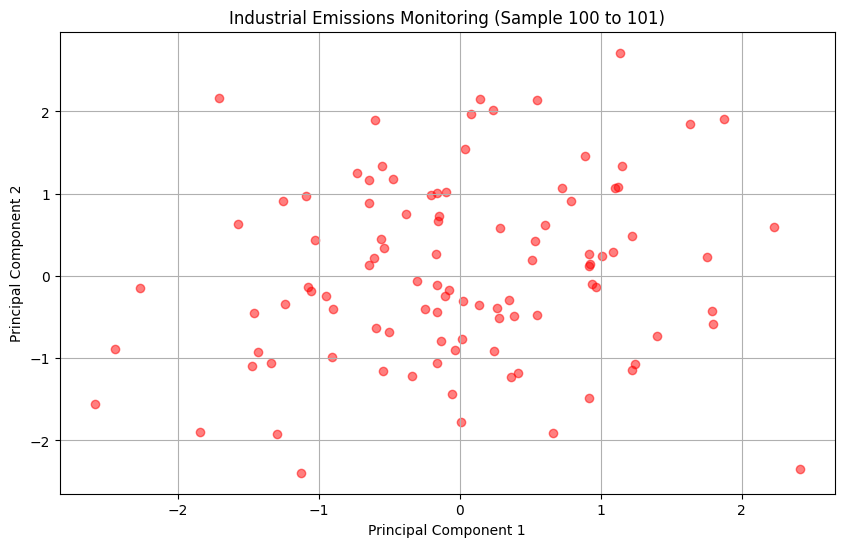

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


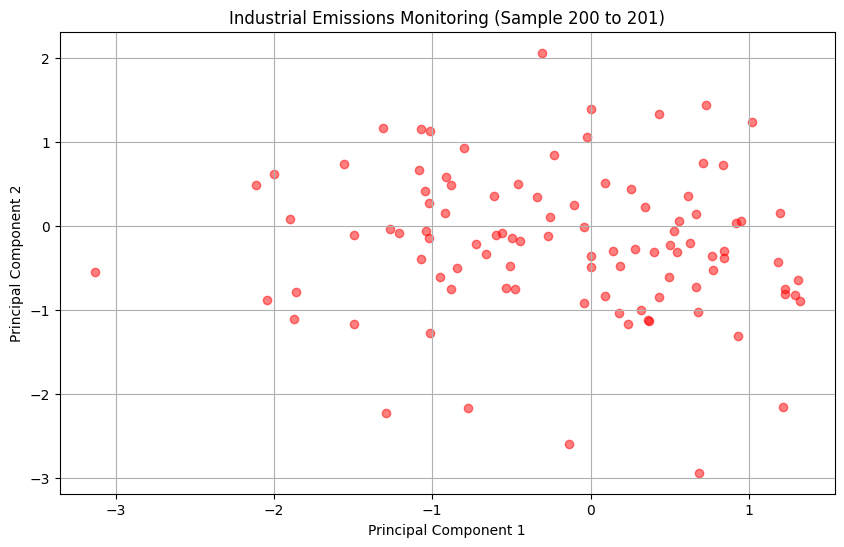

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


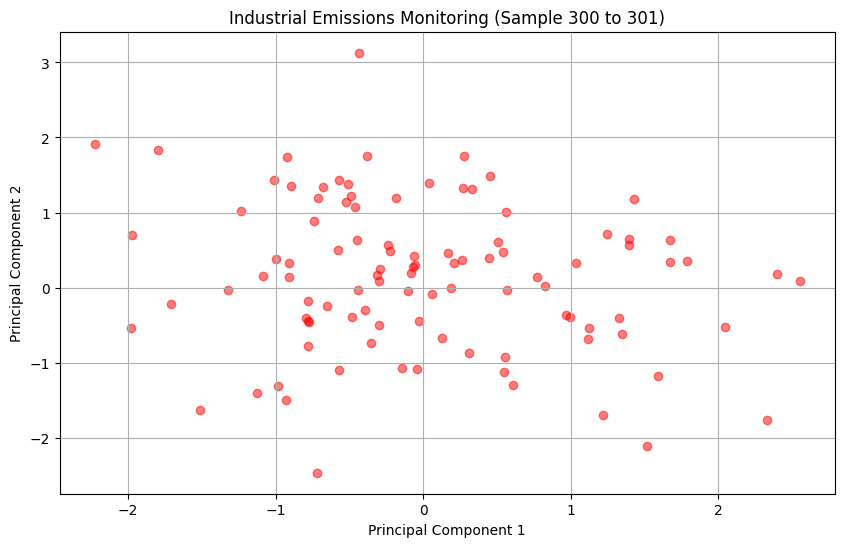

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


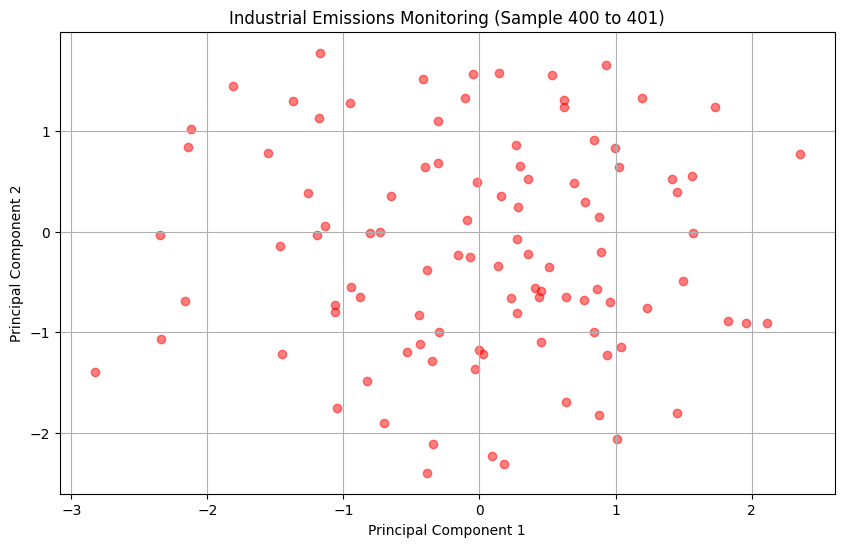

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


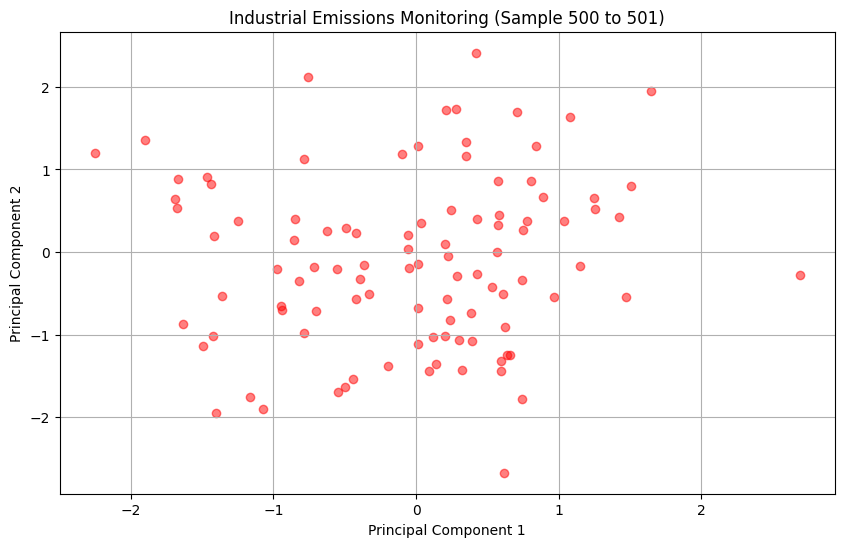

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


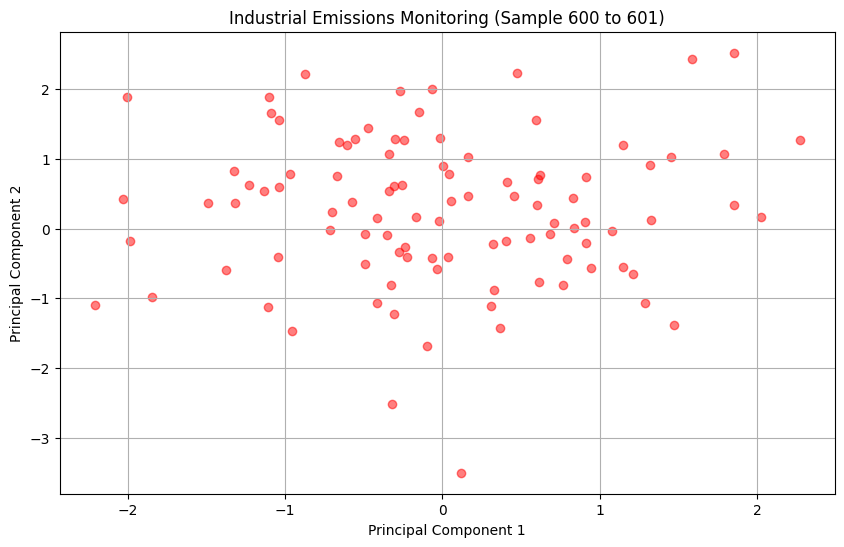

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


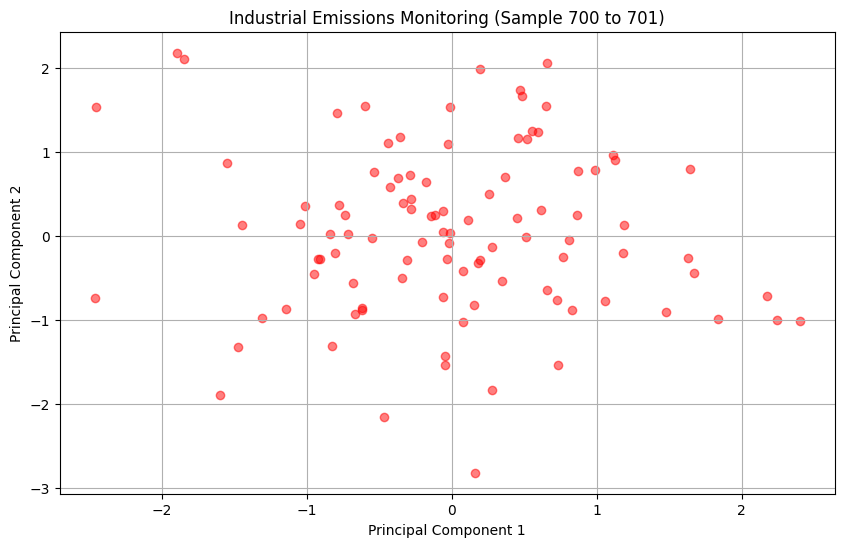

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


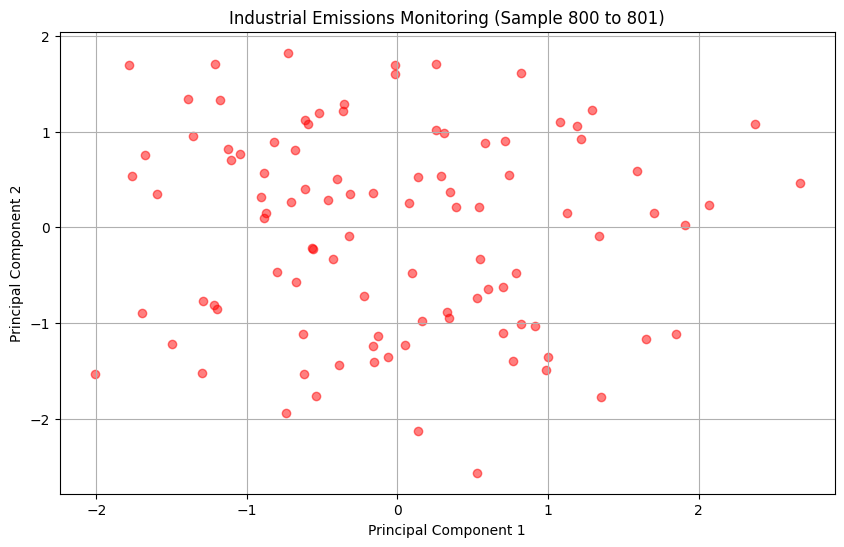

/Users/jorocca/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


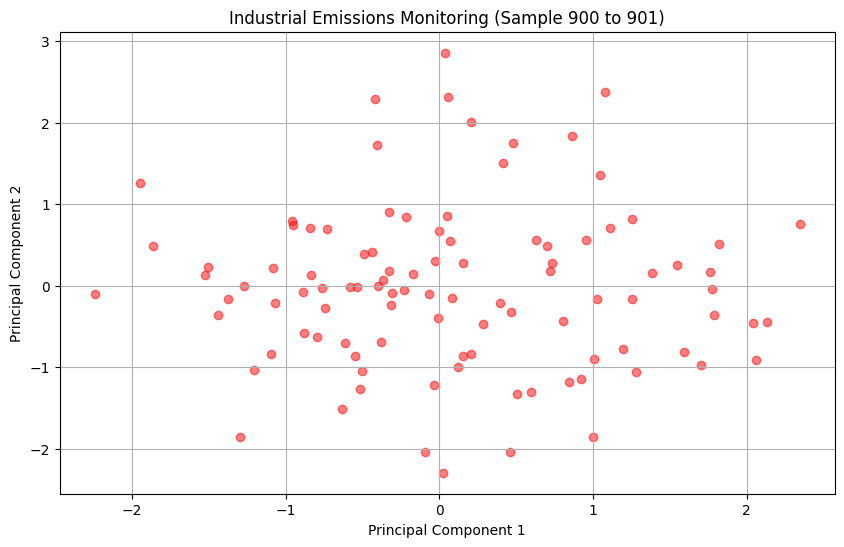

In [16]:
simulate_continuous_monitoring(pca, scaler)